In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import normalize
import time
from tqdm.notebook import tqdm
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
from os import walk
path = r'E:\competitions\kaggle\magnit_recsys-in-practice\data\jester_dataset_1_joke_texts\jokes'
f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend([fn for fn in filenames if '.html' in fn])
    break


In [8]:
len(ff)

100

In [4]:
ff = glob.glob(path + r'\*.html')
ff

['E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init1.html',
 'E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init10.html',
 'E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init100.html',
 'E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init11.html',
 'E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init12.html',
 'E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init13.html',
 'E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init14.html',
 'E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init15.html',
 'E:\\competitions\\kaggle\\magnit_recsys-in-practice\\data\\jester_dataset_1_joke_texts\\jokes\\init16.html',
 

In [5]:
alldocs = []

for filename in ff:
    with open(filename, 'rt') as file:
        rows = file.readlines()

    start_index = None
    end_index = None
    for i, row in enumerate(rows):
        if 'begin of joke' in row:
            start_index = i

        if 'end of joke' in row:
            joke = rows[start_index + 1 : i]

            alldocs.append(''.join(joke)
                         .replace('<P>', '')
                         .replace('<p>', '')
                         .replace('</i>', ' ')
                         .replace('<i>', ' ')
                         .replace('<BR>', ' ')
                         .replace('&nbsp;', ' ')
                         .replace('<br>', ' ')
                         .replace('</UL>', ' ')
                         .replace('\n', ' ')
                        )

            continue

In [6]:
len(alldocs)

100

In [35]:
for j in alldocs:
    print(j)

A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer's disease".  The man replies "Well,thank God I don't have cancer!" 
Two cannibals are eating a clown, one turns to other and says:  "Does this taste funny to you?   
Q: Whats the difference between greeting a Queen and greeting the President of the United  States?  A: You only have to get on  one knee  to greet the queen. 
Q. What do a hurricane, a tornado, and a redneck divorce all have in common?  A. Someone's going to lose their trailer... 
A guy stood over his tee shot for what seemed an eternity, looking up, looking down, measuring the distance, figuring the wind direction and speed. Driving his partner nuts.  Finally his exasperated partner says, "What the hell is taking so long? Hit the goddamn ball!" The guy answers, "My wife is up there watching me from the clubhouse. I want to make this a perfect shot." "Well, hell, man, you don't stand a snowball's chance in hell of hitting her fr

In [7]:
[len(x) for x in alldocs]

[163,
 97,
 158,
 122,
 467,
 103,
 569,
 90,
 62,
 86,
 306,
 196,
 383,
 120,
 109,
 175,
 85,
 80,
 162,
 493,
 324,
 566,
 741,
 88,
 101,
 304,
 659,
 78,
 292,
 549,
 348,
 386,
 183,
 149,
 111,
 132,
 70,
 328,
 194,
 67,
 240,
 348,
 1123,
 278,
 416,
 95,
 391,
 90,
 106,
 1217,
 957,
 414,
 592,
 79,
 126,
 212,
 646,
 78,
 642,
 623,
 601,
 88,
 728,
 617,
 269,
 850,
 773,
 76,
 187,
 398,
 533,
 199,
 135,
 143,
 643,
 82,
 97,
 118,
 84,
 382,
 377,
 144,
 399,
 153,
 126,
 138,
 420,
 346,
 799,
 470,
 104,
 718,
 494,
 626,
 178,
 161,
 338,
 428,
 534,
 118]

C:\Temp\ipykernel_10336\2040944479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([len(x) for x in alldocs])


<AxesSubplot:ylabel='Density'>

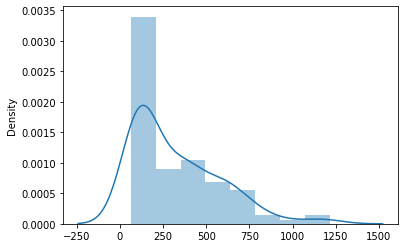

In [8]:
sns.distplot([len(x) for x in alldocs])

In [16]:
df = pd.read_excel(r'E:\competitions\kaggle\magnit_recsys-in-practice\data\jester-data-1\jester-data-1.xls', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [19]:
col = ["JID"]
col.extend([str(i) for i in range(1, 101)])
df.columns = col
df

,JID,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [12]:
df[df < 99].notna()

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,False,False,False,True,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
24978,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
24979,True,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
24980,True,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df.groupby('JID').agg(list)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
JID,,,,,,,,,,,,,,,,,,,,,
36,"[-2.91, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99...","[4.08, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[-5.73, -5.49, -6.8, -0.63, 1.7, 4.08, -0.49, ...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 0.3...","[2.48, 5.15, -8.79, -8.88, 6.55, -8.93, 5.0, 9...","[-5.29, -1.89, -9.13, -3.93, 0.39, -5.58, -3.2...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[1.46, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....",...,"[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[6.17, 99.0, 99.0, 99.0, 99.0, 99.0, 3.83, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 1.89, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99...."
37,"[99.0, 99.0, 99.0, 99.0, 99.0, -5.44, 99.0, 99...","[99.0, 99.0, 99.0, 99.0, 99.0, -0.87, 99.0, 99...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[8.45, 1.6, 8.74, 0.83, 3.2, -5.0, 7.52, 3.45,...","[99.0, 99.0, 0.63, 99.0, 99.0, 99.0, 9.22, 99....","[6.6, -2.86, 7.67, 0.34, 6.94, 2.77, 3.16, 2.3...","[-1.12, -4.27, 5.39, 0.05, -7.96, -0.19, 3.16,...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, -4.81, 99.0, 99...",...,"[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, -2.38, 99.0, 99.0, -1.07, 99.0, 99.0, 9...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 5.4...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, -8.25, 99.0, 99...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99...."
38,"[99.0, 99.0, 6.17, 5.29, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 7.77, 6.6, 99.0, 99.0, 99.0, 99.0...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[-1.99, 2.33, -1.55, -0.1, -3.59, -9.42, -4.32...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[-0.19, 5.87, -8.93, -7.33, -9.95, 0.97, 3.45,...","[-4.17, -4.42, 7.28, -9.17, -9.66, 6.46, 4.37,...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 3.59, 99.0, 4.27, 99.0, 5.73, 5.6...",...,"[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, -2.18, 99.0, 7.14, 7....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, -2.52, 99.0, 99.0, 99.0, 99.0, 99.0, -0...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99...."
39,"[-6.31, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99...","[-1.94, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[3.69, 7.77, 1.36, 4.17, 1.17, 0.34, -3.06, 4....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[-4.08, 8.54, 1.07, -0.29, -4.47, 2.48, 2.67, ...","[3.06, 8.93, -2.86, -0.29, 1.07, -4.85, -5.87,...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....",...,"[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, -0....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99....","[99.0, 99.0, 0.58, 99.0, 99.0, 99.0, 99.0

In [5]:
train_joke_df = pd.read_csv(r'data\recsys-in-practice\train_joke_df.csv')
test_joke_df_nofactrating = pd.read_csv(r'data\recsys-in-practice\test_joke_df_nofactrating.csv')
sample_submission = pd.read_csv(r'data\recsys-in-practice\sample_submission.csv')

In [3]:
train_joke_df

,UID,JID,Rating
0,18029,6,-1.26
1,3298,64,-4.17
2,3366,58,0.92
3,12735,92,3.69
4,11365,38,-6.60
...,...,...,...
1448359,22604,26,2.82
1448360,22255,36,-1.94
1448361,21056,40,-9.56
1448362,12328,97,0.87


In [4]:
test_joke_df_nofactrating

,InteractionID,UID,JID
0,0,11228,39
1,1,21724,85
2,2,16782,56
3,3,12105,42
4,4,14427,2
...,...,...,...
362086,362086,3085,66
362087,362087,13765,31
362088,362088,10341,29
362089,362089,3553,8


In [6]:
sample_submission

,InteractionID,Rating
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
362086,362086,0.0
362087,362087,0.0
362088,362088,0.0
362089,362089,0.0


In [7]:
train_joke_df.groupby("UID").count().mean()

JID       57.973982
Rating    57.973982
dtype: float64

In [12]:
np.unique(train_joke_df["JID"]).size, np.unique(train_joke_df["JID"])[:10]

(100, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64))

In [13]:
np.unique(train_joke_df["UID"]).size, np.unique(train_joke_df["UID"])[:10]

(24983, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64))

In [14]:
np.unique(test_joke_df_nofactrating["UID"]).size

24983

In [15]:
test_joke_df_nofactrating.groupby("UID").count().mean()

InteractionID    14.493496
JID              14.493496
dtype: float64

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

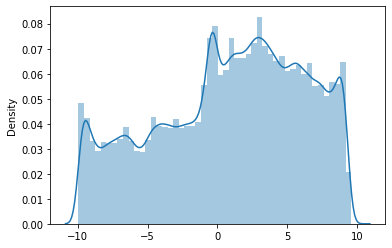

In [21]:
sns.distplot(train_joke_df['Rating'].values)

In [23]:
np.unique(train_joke_df["Rating"]), np.unique(train_joke_df["Rating"]).size

(array([-9.95, -9.9 , -9.85, -9.81, -9.76, -9.71, -9.66, -9.61, -9.56,
        -9.51, -9.47, -9.42, -9.37, -9.32, -9.27, -9.22, -9.17, -9.13,
        -9.08, -9.03, -8.98, -8.93, -8.88, -8.83, -8.79, -8.74, -8.69,
        -8.64, -8.59, -8.54, -8.5 , -8.45, -8.4 , -8.35, -8.3 , -8.25,
        -8.2 , -8.16, -8.11, -8.06, -8.01, -7.96, -7.91, -7.86, -7.82,
        -7.77, -7.72, -7.67, -7.62, -7.57, -7.52, -7.48, -7.43, -7.38,
        -7.33, -7.28, -7.23, -7.18, -7.14, -7.09, -7.04, -6.99, -6.94,
        -6.89, -6.84, -6.8 , -6.75, -6.7 , -6.65, -6.6 , -6.55, -6.5 ,
        -6.46, -6.41, -6.36, -6.31, -6.26, -6.21, -6.17, -6.12, -6.07,
        -6.02, -5.97, -5.92, -5.87, -5.83, -5.78, -5.73, -5.68, -5.63,
        -5.58, -5.53, -5.49, -5.44, -5.39, -5.34, -5.29, -5.24, -5.19,
        -5.15, -5.1 , -5.05, -5.  , -4.95, -4.9 , -4.85, -4.81, -4.76,
        -4.71, -4.66, -4.61, -4.56, -4.51, -4.47, -4.42, -4.37, -4.32,
        -4.27, -4.22, -4.17, -4.13, -4.08, -4.03, -3.98, -3.93, -3.88,
      

In [26]:
train_joke_df[train_joke_df["Rating"] >= 9]

,UID,JID,Rating
38,14428,2,9.37
115,18159,15,9.08
154,14130,40,9.22
172,21966,63,9.13
180,992,99,9.03
...,...,...,...
1448309,12797,68,9.27
1448316,9718,89,9.08
1448322,11041,69,9.22
1448350,15184,65,9.13
